In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 2.1 Systems of Linear Equations

Let's represent the general form for a system of linear equations:
$$a_{11}x_1 + \cdots + a_{1n}x_n = b_1 \\ \vdots \\ a_{m1x_1} + \cdots + a_{mn}x_n = b_m \\ \ \\ \equiv \mathbf{A}\mathbf{x} = \mathbf{b}$$
Where $\mathbf{A}, \mathbf{x}, \mathbf{b} \in \reals^n$

The $n$-tuple $(x_1, ..., x_n) \in \reals$ that satisfies all of these equations simultaneously is the *solution* of the linear equation system.

## 2.2 Matrices

The elementwise multiplication of matrices is called the ***Hadamard Product***

Some properties of matrix multiplication (*dot products*) and addition:
- ***Associativity:***
$$\forall \mathbf{A} \in \reals^{m\times n}, \mathbf{B} \in \reals^{n\times p}, \mathbf{C} \in \reals^{p\times q}: \ (\mathbf{A}\mathbf{B})\mathbf{C} = \mathbf{A}(\mathbf{B}\mathbf{C})$$
- ***Distributivity:***
$$\forall \mathbf{A}, \mathbf{B} \in \reals^{m\times n}, \mathbf{C}, \mathbf{D} \in \reals^{n\times p}: \ (\mathbf{A} + \mathbf{B})\mathbf{C} = \mathbf{A}\mathbf{C} + \mathbf{B}\mathbf{C} \ ; \ \ \mathbf{A}(\mathbf{C} + \mathbf{D}) = \mathbf{A}\mathbf{C} + \mathbf{A}\mathbf{D} $$

### Inverse and Transpose

**Definition of Inverse:**
- For a square matrix $\mathbf{A} \in \reals^{n\times n}$, $\mathbf{A}^{-1}$ is its *inverse* if and only if $\mathbf{A}^{-1}$ has the property that: $$\mathbf{A}\mathbf{A}^{-1} = \mathbf{I}_n = \mathbf{A}^{-1}\mathbf{A}$$

A matrix may be thought of as a series of transformations applied to a vector or set of vectors (like those comprising a space). The inverse is then just the set of reverse transformations. For example:

[[ 0  3]
 [-3  0]
 [ 3  3]]


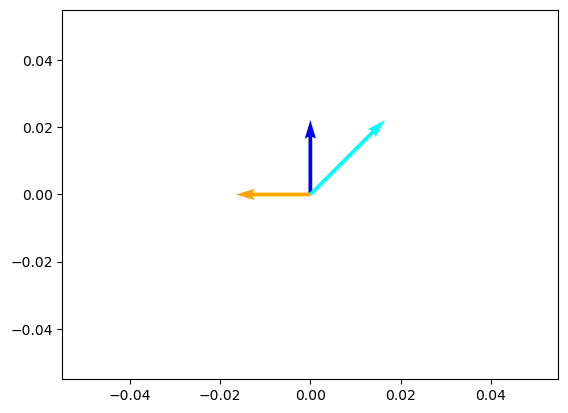

In [4]:
rotate = np.array([[0, -1], [1, 0]])  # rotate by 90-degrees
shear = np.array([[0, 1], [1, 1]])   # applye a 45-degree shear

origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

v =  np.array([0, 3])  # original vector

V = np.array([v, rotate @ v, shear @ v])

print(V)

plt.quiver(
    *origin, # unpack origin coordinates
    V[:, 0], # x-direction
    V[:, 1], # y-direction
    color = ['blue', 'orange', 'cyan'],
    scale = 20
)

plt.show()

The orange arrow represents the original vector $\mathbf{v}$. The blue arrow is the result of a 90-degree rotation, $\mathbf{R}$ applied to the $\mathbf{v}$. The cyan arrow is the result of a shear, $\mathbf{S}$ applied to $\mathbf{v}$. Written out, these transformations are respectively:
$$\begin{bmatrix} 0 \ -1 \\ 1 \ \ \ \ \ 0 \end{bmatrix} \begin{bmatrix} 0 \\ 3 \end{bmatrix} = \begin{bmatrix} -3 \\ 0 \end{bmatrix}$$
$$\begin{bmatrix} 0 \ \ 1 \\ 1 \ \ 1 \end{bmatrix} \begin{bmatrix} 0 \\ 3 \end{bmatrix} = \begin{bmatrix} 3 \\ 3 \end{bmatrix}$$

Both of these transformations are reversible. We may use the inverses $\mathbf{R}^{-1}$ and $\mathbf{S}^{-1}$ to the transformed vector to yield the original vector. In this case, the inverses are:
$$\begin{bmatrix} 0 \ \ \ \ 1 \\ -1 \ \ 0 \end{bmatrix} \begin{bmatrix} -3 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 3 \end{bmatrix}$$
And similarly:
$$\begin{bmatrix} -1 \ \ \ \ 1 \\ 1 \ \ 0 \end{bmatrix} \begin{bmatrix} 3 \\ 3 \end{bmatrix} = \begin{bmatrix} 0 \\ 3 \end{bmatrix}$$

In [6]:
np.linalg.inv(rotate), np.linalg.inv(shear)

(array([[ 0.,  1.],
        [-1., -0.]]),
 array([[-1.,  1.],
        [ 1.,  0.]]))

But how can we know that these are the appropriate inverses? Afterall, we can easily find other transformations that equivalently return the original vector $\mathbf{v}$. Well, there's a process outlined in the next section...

Not every matrix is invertible. An invertible matrix is called ***regular/invertible/nonsingular*** while a non-invertible matrix is called ***singular/noninvertible***. Furthermore, a matrix must be square to be invertible. 

Let's expand on this square matrices thing. A non-square matrix has either more rows than columns or more columns than rows. Consider an $(m \times n)$ matrix $\mathbf{A}$ with $m > n$ that transforms a $(n \times 1)$ column vector $\mathbf{v}$. The result of which, $\mathbf{A}\mathbf{v} = \mathbf{b}$ is an $(m \times 1)$ column vector. Because $m > n$, we cannot determine a *unique* transformation to convert $\mathbf{b}$ back into $\mathbf{v}$. The tranformation applied by $\mathbf{A}$ has projected $\mathbf{v}$ into a higher dimensional space. Specifically, it has increased the column space of the vector. 

Working in the opposite direction, with $m < n$, we *canot* identify *any* transformation that will yield the original vector because the resulting vector $\mathbf{b}$ spans a lower dimensional space than the original vector $\mathbf{v}$. So, we simply do not have enough information to reverse the transformation. Now, there is a caveat to this: There may exist inverses when the result of the transformation lies on the span of the original vector. E.g., when the resulting vector lies on the plane spanned by the original vector...

These cases have special names: 
- When a matrix has more rows than columns, $m > n$, it is said to be ***over-determined***. 
- When a matrix has more columns than rows, $m < n$, it is said to be ***under-determined***.

**Definition of Transpose:**
- For $\mathbf{A} \in \reals^{m\times n}$ the matrix $\mathbf{B} \in \reals^{n\times m}$ with $b_{ij} = a_{ji}$ is the transpose of $\mathbf{A}$. It is denoted $\mathbf{A}^\intercal$

In general, the transpose of a matrix may be obtained by writing its columns as rows and its rows as columns.

#### Some Properties of Inverses and Transposes
$$
(\mathbf{A} \mathbf{B})^{-1} = \mathbf{B}^{-1}\mathbf{A}^{-1} \\
(\mathbf{A} + \mathbf{B})^{-1} \ne \mathbf{A}^{-1} + \mathbf{B}^{-1} \\
\ \\
(\mathbf{A}\mathbf{B})^\intercal = \mathbf{B}^\intercal \mathbf{A}^\intercal \\
(\mathbf{A} + \mathbf{B})^\intercal = \mathbf{A}^\intercal + \mathbf{B}^\intercal
$$

**Definition of Symmetric Matrix:**
- A matrix $\mathbf{A} \in \reals^{n\times n}$ is symmetric if $\mathbf{A} = \mathbf{A}^\intercal$

Note that the sum of symmetric matrices is always symmetric, but their products need not be.

### Elementary Transformations

Elementary transformations help to solve systems of linear equations by keeping the solution set *the same*, but transforming the equation system into a simpler form. The basic elementary operations are as follows:
- Exchange of two equations (i.e. rows in the matrix)
- Multiplication of an equation (row) by a constant $\lambda \in \reals$
- Addition of two equations (rows)

I'm going to skip over most of this. Although knowing what row-echelon form and Gaussian elimination are is valuable, I don't really care about the algorithmic processes of elementary transformations.

**Definition of Row-Echelon Form:**
- A matrix is in row-echelon form if:
    - All rows that contain only zeros are at the bottom of the matrix
    - The first nonzero number from the left (also called the *pivot* or the *leading coefficient*) of each nonzero row is always strictly to the right of the pivot of the row above it
- The variables corresponding to the pivots in a row-echelon form matrix are called the *basic variables* and the other variables are called the *free variables*
- E.g. $$\begin{bmatrix} 2 \ \ 0 \ \ 6 \ \ 9 \\ 0 \ \ 1 \ \ 3 \ \ 2 \\ 0 \ \ 0 \ \ 4 \ \ 1 \end{bmatrix}$$

**Definition of Reduced-Row-Echelon Form:**
- A matrix is in RREF if"
    - It is in row-echelon form (REF)
    - Every pivot is $1$
    - The pivot is the only nonzero entry in its *column*
- E.g. $$\begin{bmatrix} 1 \ \ 0 \ \ 0 \ \ 9 \\ 0 \ \ 1 \ \ 0 \ \ 2 \\ 0 \ \ 0 \ \ 1 \ \ 1 \end{bmatrix}$$

**Gaussian Elimination:**
- Gaussian elimination is an algorithm that performs elementary row transformations to bring a system of linear equations into RREF.

## 2.4 Vector Spaces

### Groups

A ***Group*** is a set of elements *and* an operation defined on these elements that keeps some structure of the set intact.

**Definition of Group:**
- Consider a set $\mathcal{G}$ and an operation $\otimes : \mathcal{G} \times \mathcal{G} \rightarrow \mathcal{G}$ defined on $\mathcal{G}$. Then $G \coloneqq ( \mathcal{G}, \otimes )$ is called a *group* if the following hold:
    1. ***Closure*** of $\mathcal{G}$ under $\otimes$
        - $\forall \ x, y \ \in \mathcal{G} \ : \ x \otimes y \in \mathcal{G}$
    2. ***Associativity***
        - $\forall \ x, y, z \ \in \mathcal{G} \ : \ (x \otimes y ) \otimes z = x \otimes (y \otimes z )$
    3. ***Neutral Element***
        - $\exists e \in \mathcal{G} \ \forall x \in \mathcal{G} \ : \ x \otimes e = x \ \ \text{and} \ \ e \otimes x = x$
    4. ***Inverse Element***
        - $\forall x \in \mathcal{G} \ \exists y \in \mathcal{G} \ : \ x \otimes y = e \ \ \text{and} \ \ y \otimes x = e$
            - Where $e$ is the neutral element.
            - The inverse element is typically denoted $x^{-1}$

If the additional characteristic of *commutativity* holds, then the group is an ***Abelian Group***.
- ***Commutative***
    - $\forall x, y \in \mathcal{G} \ : \ x \otimes y = y \otimes x$

**Definition of General Linear Group**
- The set of invertible matrices $\mathbf{A} \in \reals^{n \times n}$ is a group w.r.t. the matrix multiplication operation and is called the general linear group. It is denoted $GL(n, \reals)$
    - Note that because matrix multiplication is *not commutative*, the general linear group *is not* and Abelian group

### Vector Spaces

**Definition of Vector Space:**
- A real-valued vector space $V = (\mathcal{V}, +, \cdot)$ is a set $\mathcal{V}$ with *two* operations: $$ + \ : \ \mathcal{V} \times \mathcal{V} \rightarrow \mathcal{V} \\ \cdot \ : \ \reals \times \mathcal{V} \rightarrow \mathcal{V}$$

The first operations, $+$, is vector addition and is an inner operation; that is, it only operates on elements already in the set $\mathcal{V}$. The operation $\cdot$ is an *outer* operation; that is, it need not operate only on elements of the set, but on any element in $\reals$.

Vector spaces satisfy the following properties:
1. $(\mathcal{V}, +)$ is an Abelian group
2. ***Distributivity***
    1. $\forall \lambda \in \reals; \ \mathbf{x}, \mathbf{y} \in \mathcal{V} \ : \ \lambda \cdot (\mathbf{x} + \mathbf{y}) = \lambda \cdot \mathbf{x} + \lambda \cdot \mathbf{y}$
    2. $\forall \lambda, \psi \in \reals; \ \mathbf{x} \in \mathcal{V} \ : \ (\lambda + \psi) \cdot \mathbf{x} = \lambda \cdot \mathbf{x} + \psi \cdot \mathbf{x}$
3. ***Associativity*** (of the outer operation $\cdot$)
    - $\forall \lambda, \psi \in \reals; \ \mathbf{x} \in \mathcal{V} \ : \ \lambda \cdot (\psi \cdot \mathbf{x}) = (\lambda \psi) \cdot \mathbf{x}$
4. ***Neutral Element*** (of the outer operation $\cdot$)
    - $\forall \mathbf{x} \in \mathcal{V} \ : \ 1 \cdot \mathbf{x} = \mathbf{x}$

The outer operation $\cdot$ corresponds to a form of scaling, such as scalar multiplication.

This is a much more rigorous definition of vector spaces than the descriptive definition given when learning the geometric intuition of linear algebra. However, this definition is consistent with the geometric interpretation and any meaningful characteristics of the geometric interpretation are extendable to this well defined interpretation.

**Definition of Vector Subspace:**
- Let $V = (\mathcal{V}, +, \cdot)$ be a vector space and $\mathcal{U} \subseteq \mathcal{V}$ (note that this denotes $\mathcal{U}$ as a subset of $\mathcal{V}$). Then $U=(\mathcal{U}, +, \cdot)$ is a *vector subspace* of $V$ if $U$ is also a vector space. We denote this subsapace as $U \subseteq V$.

A vector subspace $U$ naturally inherits many properties directly from $V$ because any properties that hold for all $\mathbf{x} \in \mathcal{V}$ also holds for all $\mathbf{x} \in \mathcal{U} \subseteq \mathcal{V}$.

To determine whether $U$ is a subspace of $V$, we need to show that:
1. $\mathcal{U} \ne \empty$; in particular: $\mathbf{0} \in \mathcal{U}$
2. Closure of $U$:\
    a. W.r.t. the outer operation: $\forall \lambda \in \reals, \ \forall \mathbf{x} \in \mathcal{U} \ : \ \lambda \mathbf{x} \in \mathcal{U}$\
    b. W.r.t. the inner operation: $\forall \mathbf{x}, \mathbf{y} \in \mathcal{U} \ : \ \mathbf{x} + \mathbf{y} \in \mathcal{U}$

**NOTE:**
- Not all *subsets* of $\reals^n$ are *subspaces* of $\reals^n$
    - We may easily find subsets of $\reals^n$ for which closure is violated or for which $\mathbf{0}$ is not an element.
    - E.g. the cartesian reals $(x,y) \in \reals^2$. The line $y = x - 2$ is a subset of $\reals^2$ but it is not a subspace of $\reals^2$ because it does not contain $[0, 0]^\intercal$

## 2.5 Linear Independence

**Basis**
- The set of vectors from which we can represent *every other* vector in a vector space by adding them together and/or scaling them.
- Vector spaces may have many sets of basis vectors

**Definition of Linear Combination**
- For a vector space $V$ and a set of vectors $\mathbf{x}_1, ..., \mathbf{x}_k \in V$, every $\mathbf{v} \in V$ of the form $$\mathbf{v} = \lambda_1 \mathbf{x}_1 + \cdots + \lambda_k \mathbf{x}_k = \sum_{i=1}^k \lambda_i \mathbf{x}_i \in V$$ is a *linear combination* of the vectors $\mathbf{x}_1, ..., \mathbf{x}_k$. Where $\lambda_1, ..., \lambda_k \in \reals$.

**Definition of Linear Dependence**
- For a vector space $V$, the vectors $\mathbf{x}_1, ..., \mathbf{x}_k \in V$ are *linearly dependent* if there is a *non-trivial* linear combination such that $\sum_{i=1}^k \lambda_i \mathbf{x}_i = \mathbf{0}$ with at least one $\lambda_i \ne 0$.
    - The contrapositive holds; i.e., if only the trivial solution exists then the vectors are *linearly independent*

A key result of linear dependence is that vectors within the set of linearly dependent vectors are equal to some linear combination of the other vectors in the set.

## 2.6 Basis and Rank

**Definition of Generating Set and Span:**
- For a vector space $V$ and set of vectors $\mathcal{A} = {\mathbf{x}_1, ..., \mathbf{x}_k} \subseteq \mathcal{V}$, $\mathcal{A}$ is ***Generating Set*** of $V$ if every vector $\mathbf{v} \in \mathcal{V}$ can be expressed as a linear combination of the vectors ${\mathbf{x}_1, ..., \mathbf{x}_k} \in \mathcal{A}$
- The set of all linear combinations of vectors in a set of vectors, $\mathcal{A}$, is called the ***Span*** of $\mathcal{A}$
    - If $\mathcal{A}$ spans the vector space $V$ (as it does if it is a generating set), then we write $V = \text{span}[\mathcal{A}]$

**Definition of Rank:**
- The number of linearly independent columns of a matrix $\mathbf{A} \in \real^{m \times n}$ is *necessarily equal to* the number of linearly independent rows. This number is called the ***Rank*** of $\mathbf{A}$ and is denoted $\text{rk} (\mathbf{A})$

Some important properties of rank:
- The columns of $\mathbf{A} \in \real^{m \times n}$ span a subspace $U \subseteq \reals^m$ with $\text{dim}(U) = \text{rk}(\mathbf{A})$
- The rows of $\mathbf{A} \in \real^{m \times n}$ span a subspace $W \subseteq \reals^n$ with $\text{dim}(W) = \text{rk}(\mathbf{A})$
- For all $\mathbf{A} \in \reals^{n \times n}$ it holds that $\mathbf{A}$ is invertible if and only if $\text{rk}(\mathbf{A}) = n$
- A matrix $\mathbf{A} \in \reals^{m \times n}$ has ***Full Rank*** if its rank equals the largest possible rank for a matrix of the same dimensions. This means that its rank is the lesser of its number of rows or columns; i.e., $\text{rk}(A) = \min(m, n)$
    - A matrix that does not have full rank is called ***Rank Deficient***

**Definition of Basis:**
- A generating set $\mathcal{A}$ of a vector space $V$ is called *minimal* if there exists no smaller set that spans $V$. Every *linearly independent* generating set of $V$ that is minimal is called a ***Basis*** of $V$

## 2.7 Linear Mappings

Given two real vector spaces $V,W$, we denote a mapping as: $$\Phi : \ V \rightarrow W$$
A mapping will preserve the structure of the vector space (i.e., ensure the result is also a vector space) if:
$$\Phi (\mathbf{x} + \mathbf{y}) = \Phi(\mathbf{x}) + \Phi(\mathbf{y}) \\ \Phi(\lambda \mathbf{x}) = \lambda \Phi(\mathbf{x})$$

**Definition of Linear Mapping:**
- For vector spaces $V, W$, a mapping $\Phi: \ V \rightarrow W$ is called a *linear mapping* if:
$$\forall \mathbf{x}, \mathbf{y} \in V \ \forall \lambda, \psi \in \reals \ : \ \Phi(\lambda\mathbf{x} + \psi\mathbf{y}) = \lambda\Phi(\mathbf{x}) + \psi\Phi(\mathbf{y})$$

Linear mappings may also be called *vector space homomorphisms* or ***Linear Transformations*** (much more familiar term)

**Special Mappings:**\
For a mapping $\Phi: \ \mathcal{V} \rightarrow \mathcal{W}$:
- ***Injective*** if:
$$ \forall \mathbf{x}, \mathbf{y} \in \mathcal{V} \ : \ \Phi(\mathbf{x}) = \Phi(\mathbf{y}) \implies \mathbf{x} = \mathbf{y}$$
- ***Surjective*** if:
$$\Phi(\mathcal{V}) = \mathcal{W}$$
- ***Bijective*** if the mapping is both injective *and* surjective

Note on surjective mappings:\
 If $\Phi$ is surjective, then every element in $\mathcal{W}$ can be "reached" from $\mathcal{V}$ using $\Phi$. This seems self explanatory from the denotation of a mapping. However, we need to note that the mapping $\Phi : \ \mathcal{V} \rightarrow \mathcal{W}$ itself does not imply that the set $\mathcal{V}$ maps to the *entirety* of the set $\mathcal{W}$.

Note on bijective mappings:\
A bijective mapping $\Phi$ can be reversed. That is, there exists a mapping $\Psi: \ \mathcal{W} \rightarrow \mathcal{V}$ such that $\Psi \big( \Phi(v\mathbf{x}) \big) = \mathbf{x}$. This mapping $\Psi$ is the inverse of $\Phi$ and is denoted $\phi^{-1}$.

More mapping names:
- ***Isomorphism:*** $\Phi: V \rightarrow W$ is linear and bijective
- ***Endomorphism:*** $\Phi: V \rightarrow V$ is linear
- ***Automorphism:*** $\Phi: V \rightarrow V$ is linear and bijective

**Theorem (2.17):**
- Finite-dimensional vector spaces $V$ and $W$ are *isomorphic* if and only if $\text{dim}(V) = \text{dim}(W)$

In words, this theorem states that there exists a linear, bijective mapping between any two vector spaces of the same dimension. This means that vector spaces of the same dimension are effectively the same because they may be transformed into each other without any loss. This seems tautological because what other difference between vector spaces can exist besides their dimensions? A difference in basis? But that isn't part of the definition of a vector space... This theorem does correspond to the understanding of the concept of change of basis...

This theorem also formalizes a justification for treating the vector space of $m \times n$ matrices, $\reals^{m \times n}$, and the vector space of length $mn$ vectors, $\reals^{mn}$, as the same - because they have the same $\text{dim}()$, and thus there exists a linear, bijective mapping between the two. This treatment is functionally very useful in modeling. It makes sense following the logic of the formalized definitions of spaces and transformations, but I don't see a geometric intuition for it...

### Matrix Representation of Linear Mappings

By theorem 2.17, any $n$ dimensional vector space is isomorphic to any other vector space in $\reals^n$. So, we can switch between the bases of any vector space in $\reals^n$ without losing any information. Let's denote the basis of vector space $V$ as: $$B = (\mathbf{b}_1, ..., \mathbf{b}_n)$$ 
We denote $B$ as a *tuple* of basis vectors instead of as a set because we care about the *order* of the basis vectors in $B$. Thus, $B$ is called an ***Ordered Basis*** of $V$.

**Definition of Coordinates:**
- For a vector space $V$ with an ordered basis $B$, for any $\mathbf{x} \in V$ we may obtain a unique representation (i.e. a linear combination) of $\mathbf{x}$ w.r.t. $B$. $$\mathbf{x} = \alpha_1\mathbf{b}_1 + \cdots + \alpha_n \mathbf{b}_n$$
Then the coefficients $\alpha_1, ..., \alpha_n$ are the ***Coordinates*** of $\mathbf{x}$ w.r.t. $B$, and the vector $\mathbf{\alpha} \in \reals^n$ is the *coordinate vector / coordinate representation* of $\mathbf{x}$ w.r.t. the ordered basis $B$.

In the cartesian coordinate system this definition of coordinates is made very clear. Any point on the cartesian plane may be represented as a vector from the origin, e.g. the point $(2, 5)$ may be written as the vector $[2, 5]^\intercal$. With ***Canonical Basis Vectors*** $\mathbf{e}_1 = [1, 0]^\intercal$ and $\mathbf{e}_2 = [0, 1]^\intercal$, this point (which we already think of as a coordinate) may be expressed as a coordinate $(\alpha_1 = 2, \alpha_2 = 5)$

So, in effect, a basis *defines* a coordinate system. 

**Definition of Transformation Matrix:**
- Let $V$ be a vector space with $n$ ordered bases $B$ and $W$ be a vector space with $m$ ordered bases $C$. For a linear mapping $\Phi: V \rightarrow W$: $$\Phi(\mathbf{b}_j) = \alpha_{1j}\mathbf{c}_1 + \cdots + \alpha_{mj} \mathbf{c}_m = \sum_{i=1}^m \alpha_{ij} \mathbf{c}_i$$
This is the unique representation of $\Phi(\mathbf{b}_j)$ w.r.t. $C$.\
Then, we call the $m \times n$ matrix $\mathbf{A}_\Phi$ with elements given by $\mathbf{A}_\Phi(i,j) = \alpha_{ij}$ the ***Transformation Matrix*** of $\Phi$.

Note that the elements of the $j$-th column of $\mathbf{A}_\Phi$ are the *coordinates* of $\Phi(\mathbf{b}_j)$ w.r.t. the ordered basis $C$ of $W$.

The transformation matrix effectively maps coordinates w.r.t. the ordered basis in one vector space to the coordinates w.r.t. the ordered basis in another vector space.\
I think some examples may be good here...

Consider $\Phi: V \rightarrow W$ with ordered bases $B=(\mathbf{b}_1, \mathbf{b}_2, \mathbf{b}_3)$ of $V$ and $C=(\mathbf{c}_1, \mathbf{c}_2, \mathbf{c}_3, \mathbf{c}_4)$ of $W$.

In [4]:
# phi_b1 = c1 - c2 + 3*c3 - c4
# phi_b2 = 2*c1 + c2 + 7*c3 + 2*c4
# phi_b3 = 3*c2 + c3 + 4*c4
A = np.array([
        [1, -1, 3, -1], # phi_b1
        [2, 1, 7, 2],   # phi_b2
        [0, 3, 1, 4]    # phi_b3
    ]).T
print("Tranformation matrix: \n", A)


Tranformation matrix: 
 [[ 1  2  0]
 [-1  1  3]
 [ 3  7  1]
 [-1  2  4]]


### Basis Change

We may choose to change the bases of a vector space - this can facilitate easier transformations.\
Take vector spaces $V$ and $W$ with ordered bases $B$ and $\tilde{B}$ in $V$ of length $n$ and ordered bases $C$ and $\tilde{C}$ in $W$ of length $m$. Then the transfomation matrix for the mapping $\Phi: V \rightarrow W$ may be represented as $\mathbf{A}_\Phi$ or $\mathbf{\tilde{A}}_\Phi$.

Example:
$$\mathbf{A} = \begin{bmatrix} 2 \ \ 1 \\ 1 \ \ 2 \end{bmatrix}$$ 
$\mathbf{A}$ is a transformation matrix w.r.t. the canonical basis in $\reals^2$.\
However, we may define a new basis for the same space: $$\mathbf{B} = \begin{bmatrix} 1 \ \ \ \ 1 \\ 1  -1 \end{bmatrix}$$
The transformation matrix w.r.t. this new basis $\mathbf{B}$ is:
$$\mathbf{\tilde{A}} = \begin{bmatrix} 3 \ \ 0 \\ 0 \ \ 1 \end{bmatrix}$$
This new diagonal transformation matrix $\mathbf{\tilde{A}}$ w.r.t. $\mathbf{B}$ is easier to work with than $\mathbf{A}$.

**Theorem (2.20):**
- For a linear mapping $\Phi: V \rightarrow W$ and the ordered bases (of $V$ and $W$ respectively): $$ B= (\mathbf{b}_1, ..., \mathbf{b}_n), \ \ \ \tilde{B} = (\mathbf{\tilde{b}}_1, ..., \mathbf{\tilde{b}}_n) \\ \ \\ C = (\mathbf{c}_1, ..., \mathbf{c}_m), \ \ \ \tilde{C} = (\mathbf{\tilde{c}}_1, ..., \mathbf{\tilde{c}}_m)$$ 
Then, $$\mathbf{\tilde{A}}_\Phi = \mathbf{T}^{-1}\mathbf{A}_\Phi \mathbf{S}$$
Where, $\mathbf{A}_\Phi$ is the transformation matrix of $\Phi$ w.r.t $B$ and $C$ and $\mathbf{\tilde{A}}_\Phi$ is the transformation matrix of $\Phi$ w.r.t. $\tilde{B}$ and $\tilde{C}$.\
 The matrix $\mathbf{S} \in \reals^{n \times n}$ is the transformation matrix of $V$ that maps coordinates w.r.t. $\tilde{B}$ onto coordinates w.r.t. $B$. The matrix $\mathbf{T} \in \reals^{m \times m}$ is the transformation matrix that maps coordinates w.r.t. $\tilde{C}$ onto coordinates w.r.t. $C$.

This is a lot of writing, but it's actually quite straightforward. Let's take a coordinate vector $\mathbf{x} \in V$ w.r.t $B$. Then expressing this coordinate vector w.r.t. $\tilde{B}$ is:
$$\mathbf{\tilde{x}} = \mathbf{S}^{-1}\mathbf{x}$$
Then we may map $\mathbf{\tilde{x}}$ to coordinates $\mathbf{\tilde{y}}$ w.r.t. the basis $\tilde{C}$ as:
$$\mathbf{\tilde{y}} = \mathbf{\tilde{A}}_\Phi \mathbf{\tilde{x}} = \mathbf{\tilde{A}}_\Phi \mathbf{S}^{-1} \mathbf{x}$$
Finally, we may map the coordinate $\mathbf{\tilde{y}}$ w.r.t. the basis $\tilde{C}$ to the coordinate $\mathbf{y}$ w.r.t. the basis $C$ as:
$$\mathbf{y} = \mathbf{T}\mathbf{\tilde{A}}_\Phi\mathbf{\tilde{x}} = \mathbf{T}\mathbf{\tilde{A}}_\Phi \mathbf{S}^{-1}\mathbf{x}$$

So, $$\mathbf{y} = \mathbf{A}_\Phi \mathbf{x} = \mathbf{T}\mathbf{\tilde{A}}_\Phi \mathbf{S}^{-1}\mathbf{x}$$
And, $$\mathbf{\tilde{y}} = \mathbf{\tilde{A}}_\Phi \mathbf{\tilde{x}} = \mathbf{T}^{-1}\mathbf{A}_\Phi \mathbf{S}\mathbf{\tilde{x}}$$

$\mathbf{S}$ and $\mathbf{T}$ are ***Identity Mappings*** - they map vectors *onto themselves* but with respect to different basises.

**Definition of Equivalence:**
- Two matrices $\mathbf{A}, \mathbf{\tilde{A}} \in \reals^{m \times n}$ are equivalent if there exist regular matrices $\mathbf{S}$ and $\mathbf{T}$ such that $\mathbf{\tilde{A}} = \mathbf{T}^{-1} \mathbf{A} \mathbf{S}$.

**Definition of Similarity:**
- Two matrices $\mathbf{A}, \mathbf{\tilde{A}} \in \reals^{n \times n}$ are *similar* if there exists a regular matrix $\mathbf{S} \in \reals^{n \times n}$ with $\mathbf{\tilde{A}} = \mathbf{S}^{-1}\mathbf{A}\mathbf{S}$ 

Similar matrices are always equivalent, but not all equivalent matrices are similar. This should be plain to see from the definitions: equivalence can hold for matrices of any shape, $\reals^{m \times n}$, while similarity can only hold for square matrices, $\reals^{n \times n}$.

### Image and Kernel

The image and kernel of a linear mapping are vector subspaces with important properties.

**Definition of Image and Kernel:**
- For a mapping $\Phi: V \rightarrow W$, the ***Kernel*** or ***Null Space*** is: $$ker(\Phi) \coloneqq \Phi^{-1}(\mathbf{0}_W) = \{\mathcal{v} \in V : \Phi(\mathcal{v}) = \mathbf{0}_W\}$$
- The ***Image*** or ***Range*** is:
$$\text{Im}(\Phi) \coloneqq \Phi(V) = \{\mathcal{w} \in W | \exists\mathcal{v} \in V: \Phi(\mathcal{v}) = \mathcal{w}\}

Written out:
- The kernel is the set of vectors $\mathcal{v} \in V$ that $\Phi$ maps onto the null vector $\mathcal{0}_W \in W$
    - The null space is the space spanned by these $\mathcal{v}$ vectors
- The image is the set of vectors $\mathcal{w} \in W$ that can be reached by any vector in $V$ through the mapping $\Phi$

For a linear transformation $\mathbf{A} \in \reals^{m \times n}$ of a linear mapping $\Phi:\reals^n \rightarrow \reals^m$, the image can be obtained as:
$$\text{Im}(\Phi) = {\mathbf{A}\mathbf{x}:\mathbf{x} \in \reals^n} = \text{span}[\mathbf{a}_1, ..., \mathbf{a}_n] \subseteq \reals^m$$
- That is, the image of the mapping is the ***Column Space*** of $\mathbf{A}$ (i.e. the span of its columns)
    - This is intuitive from the definition of the image. The set of all reachable vectors in the subspace resulting from a transformation is necessarily the span of the transformation
        - The geometric intuition for it being the span of the columns (rather than of the rows) follows from viewing the matrix as a collection of column vectors; each applying a transformation in sequence
- $\text{rk}(\mathbf{A}) = \dim(\text{Im}(\Phi))$

The kernel/null space is the general solution to the homogeneous system of linear equations $\mathbf{A}\mathbf{x} = \mathbf{0}$.
- It captures all elements in $\reals^n$ that produce $\mathbf{0} \in \reals^m$
- It is a subspace of $\reals^n$
    - This stems from it being a solution to the homogeneous system of linear equations

**Theorem 2.24 - Rank-Nullity Theorem:**
- For vector spaces $V, W$ and a linear mapping $\Phi: V \rightarrow W$, it holds that:
$$\dim(\ker(\Phi)) + \dim(\text{Im}(\Phi)) = \dim(V)$$
This is broadly intuitive if we consider the results of a linear mapping $\Phi: V \rightarrow W$. Either, we get to some vector in $W$, which is then of the set $\mathcal{w} \in W$ which comprises that image $\text{Im}(\Phi)$, or we get the zero vector $\mathbf{0}_W \in W$.

Consequences of the rank-nullity theorem:
- If $\dim(\text{Im}(V)) < \dim(V)$, then $\ker(\Phi)$ is non-trivial
    - That is, the kernel contains more than the zero-vector and $\dim(\ker(\Phi)) \ge 1$
- If $\dim(\ker(\Phi)) \ge 1$ then $\mathbf{A}_\Phi\mathbf{x} = \mathbf{0}$ has *infinitely many* solutions
    - This is the same as the matrix being *under-determined*, i.e. $m < n$. Here the column space spans a smaller subspace than the original vecotr space. So the transformation $\mathbf{A}_\Phi \mathbf{x} = \mathbf{b}$ has no solutions and homogeneous system $\mathbf{A}_\Phi \mathbf{x} = \mathbf{0}$ has infinitely many solutions (the solution space is the entirety of the null space).
    - This is equivalent to the condition that the determinant is equal to 0
    - So, when the null space has a dimensionality greater than zero than the dimensionality of the image is less than the number of columns in the matrix. This means that some dimension(s) of the original space get squished down to zero as a result of the transformation. Because entire dimensions are being squished to zero, infinitely many vectors are squished to zero, hence infinitely many solutions

## 2.8 Affine Spaces

Affine spaces are spaces that are offset from the origin - meaning that they are *no longer vector subspaces*. 

**Definition of Affine Subspace:**
- Let $V$ be a vector space with $\mathbf{x}_0 \in V$ and $U \subseteq V$. Then the subset $L$ is an *affine subspace* (or *linear manifold*) of $V$ with:
$$L = \mathbf{x}_0 + U \coloneqq \{\mathbf{x}_0 + \mathcal{u}:\mathcal{u} \in U \} \\ \ \\ = \{\mathcal{v}\in V | \exists \mathcal{u} \in U : \mathcal{v} = \mathbf{x}_0 + \mathcal{u}\} \subseteq V$$
$U$ is called the *direction* or *direction space* and $\mathbf{x}_0$ is called the *support point*.

**NOTE:**
- An affine subspace excludes $\mathbf{0}$ if $\mathbf{x}_0 \notin U$. Therefore, an affine subspace is not a vector subspace of $V$ for $\mathbf{x}_0 \notin U$

Affine subspaces may be described by ***Parameters***. For an affine space $L = \mathbf{x}_0 + U$ of $V$, every element $\mathbf{x} \in L$ may be uniquely described as:
$$\mathbf{x} = \mathbf{x}_0 + \lambda_1 \mathbf{b}_1 + \cdots + \lambda_k\mathbf{b}_k$$ 
Where the $\lambda$ coefficients are the ***Parameters*** and the $\mathbf{b}$ vectors are the ordered basis vectors.


### Affine Mappings

For vector spaces $V,W$, linear mapping $\Phi:V \rightarrow W$, and $\mathbf{a} \in W$: $$\phi: V \rightarrow W \\ \ \\ \mathbf{x} \rightarrow \mathbf{a} + \Phi(\mathbf{x})$$
The mapping $\phi$ is an *affine mapping* from $V$ to $W$, and the vector $\mathbf{a}$ is called the ***Translation Vector*** of $\phi$

## Exercises

2.7
2.9
2.10
2.12
2.14
2.15
2.17
2.19

#### Ex. 2.7
- convert to augmented matrix and bring to reduced echelon form through elementary operations
    - Solve REF system of linear equations subject to the constraint that $\sum x_i = 1$
    - Find that: $x_1 = x_2 = 3/8; \ x_3 = 2/8$

In [6]:
A = np.array([[6, 4, 3], [6, 0, 9], [0, 8, 0]])
x = np.array([3/8, 3/8, 2/8])
print((A @ x.T) / 12)

[0.375 0.375 0.25 ]


#### Ex. 2.9
Determine whether the sets are subspaces of $\reals^3$
- $A=\{(\lambda, \lambda + \mu^3, \lambda - \mu^3)|\lambda,\mu\in\reals \}$
    - We may substitut $v=\mu^3|v\in \reals$
    - Then we can represent the set as two vectors: $\mathbf{\lambda} = [1, 1, 1]^\intercal$ and $\mathbf{v} = [0, 1, -1]^\intercal$
        - These vectors include $\mathbf{0}$ and exhibit closure in $A$ under $+, \cdot$; so, they are a subspace of $\reals^3$
- $B = \{(\lambda^2, -\lambda^2, 0) | \lambda \in \reals\}$
    - For any $\lambda$, the vector $\mathbf{\lambda} = [\lambda^2, -\lambda^2, 0]^\intercal$ may be represented as $[1, -1, 0]^\intercal$. Multiplying by the scalar $-1$ yields the vector $[-1, 1, 0]^\intercal \notin B$. So, $B$ is not a subspace since it does not satisfy closure under scalar multiplication
        - Explicitly, for all $\lambda\in\reals$, we cannot reach any scaled vector of $-[\lambda^2, -\lambda^2, 0]^\intercal$ without *leaving* the subset of vectors defined by $B$ - so $B$ cannot be a vector subspace
- $C = \{(\xi_1, \xi_2, \xi_3) \in \reals^3 \ |  \ \xi_1 - 2\xi_2 + 3\xi_3 = \gamma, \ \gamma \in \reals \}$
    - Let's explicate this: any three-dimensional vector of the set $C$ exists in $\reals^3$ and is subject to the constraint that the combination of its elements equals $\gamma \in \reals$ through $\xi_1 - 2\xi_2 + 3\xi_3 = \gamma$. We are not given the value of $\gamma$, but in order for $C$ to be a vector space, it *must* contain the zero-vector $[0, 0, 0]^\intercal$. At this vector, $\gamma = 0 - 2(0) + 3(0) = 0$; therefore, $\gamma = 0$. Using this constraing, we may determine a minimum spanning set of vectors for $C$, such as $\{[3, 0, -1]^\intercal, [0, 3, 2]^\intercal \}$. Any scaled linear combination of these vectors satisfies the constraint and is real. Therefore, the space spanned by these basis vectors is a non-empty subspace closed under vector addition and scalar multiplication. So, $C$ is a subspace of $\reals^3$.

In [15]:
# demo of C
x = np.array([3, 0, -1])
y = np.array([0, 3, 2])

l1 = 7
l2 = 8
c = l1*x + l2*y  # linear combination
gamma = c[0] - 2*c[1] + 3*c[2]  # constraint

print(f'l1 * x + l2 * y = {c}')
print(f'gamma = {c[0]} - 2 * {c[1]} + 3 * {c[2]} = {gamma}' )

l1 * x + l2 * y = [21 24  9]
gamma = 21 - 2 * 24 + 3 * 9 = 0


- $D = \{(\xi_1, \xi_2, \xi_3) \in \reals^3 \ | \ \xi_2 \in \mathbb{Z}\}$
    - This one is straightforward. $\xi_2$ is given to be an integer. For $D$ to be a vector space it must satisfy closure under vector addition and scalar multiplication. So, any scalar multiple of an element of $D$ must also be an element in $D$. We can easily see that this condition is not satisfied; e.g. for cases like $\frac{1}{2}[0, 1, 0]^\intercal$. So, $D$ is not a subspace of $\reals^3$

#### 2.10
Are the sets of vectors linearly independent?

- **A.** $$x_1 = [2, -1, 3]^\intercal \\ x_2 = [1, 1, -2]^\intercal \\ x_3 = [3, -3, 8]^\intercal$$
    - Let's combine these into a matrix of column vectors an bring to REF through elementary row operations. The matrix may be reduced to: 
    $$ \begin{bmatrix} 2 \ \ \ \ \ 1 \ \ \ \ \ 3 \\ -1 \ \ \   1 \  -3 \\ 3  \ -2 \ \ \ \ 8\end{bmatrix} \rightarrow \begin{bmatrix} 1 \ \ \ 2 \ \ \ 0 \\ 0 \ \ \ 0 \ \ \ 0 \\ 0 \ \ \ 0 \ \ \ 0 \end{bmatrix}$$
    So, the set of vectors are not independent

- **B:** $$x_1 = [1, 2, 1, 0, 0]^\intercal \\ x_2 = [1, 1, 0, 1, 1]^\intercal \\ x_3 = [1, 0, 0, 1, 1]^\intercal$$
    - Again, combining these into a matrix of column vectors and bringing to RREF yields:
    $$\begin{bmatrix} 1 \ \ 0 \ \ 0 \\ 0 \ \ 1 \ \ 0 \\ 0 \ \ 0 \ \ 1 \\ 0 \ \ 0 \ \ 0 \\ 0 \ \ 0 \ \ 0 \end{bmatrix}$$
    So, the set of vectors are independent.

#### 2.12
We are given two subspaces $U_1, \ U_2$ and their spans and are asked to determine a basis for their intersecion $U_1 \bigcap U_2$. We haver:
$$ U_1 = Sp\{[1, 1, -3, 1]^\intercal, [2, -1, 0, -1]^\intercal, [-1, 1, -1, 1]^\intercal\} \\ U_2 = Sp\{[-1, -2, 2, 1]^\intercal, [2, -2, 2, 1]^\intercal, [-3, 6, -2, -1]^\intercal\}$$

The intersection of these subspaces is a subspace within which all vectors can be represented by a linear combination of the vectors in $Sp[U_1]$ ***and*** by a linear combination of the vectors in $Sp[U_2]$. So, to define this sapce we must find the minimum spanning set of vectors for all linear combinations of $Sp[U_1]$ that are *also* linear combinations of $Sp[U_2]$... This set can be represented by the simultaneous equations:
$$\alpha(1, 1, -3, 1) + \beta(2, -1, 0, -1) + \gamma(-1, 1, -1, 1) = \delta(-1, -2, 2, 1) + \theta(2, -2, 2, 1) + \rho(-3, 6, -2, -1)$$